## General Workflow

### 1) Identifying Business Problem
### 2) Data Preprocessing
### 3) Exploratory Data Analysis (EDA)

### 1) Identifying Business Problem

In this case, we're asked to develop a model for an organization that helps non-profit organizations to find donors. This model will be used to predict whether a donor will spend more than or equal to 30€, given that this donor receives a re-activation campaign. The model will be trained based on the previous campaign, and then validated with another data from other campaign.

The model is expected to have a good performance and high interpretability. In addition, we also have to emphasize why does implementing the model is better than random guessing campaign. In the end, the model will be used to predict potential customers for the upcoming campaign, and which customers are the most effective to reach.

### 2) Data Preprocessing

Our data consist of 5 csv files which includes the donor database, the amount of donated, and the selected donors during previous campaign

In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
# Drop 1st Column
donors=pd.read_csv("./data/donors.csv")

donors['dateOfBirth'] = pd.to_datetime(donors['dateOfBirth'])

donors['province'] = donors['province'].apply(lambda row: 'Antwerp' if row == 'ANTWERP' else row)

gender_dict={'F':1,'M':0,'NaN':969}
language_dict={'EN':1,'FR':2,'NL':3}
region_dict={'Brussels':1,'Flanders':2,'Missing':3,'Wallonia':4}
province_dict={'Antwerp':1,'Brussels':2,'East Flanders':3,'Flemish Brabant':4,
                'Hainaut':5,'Liege':6,'Limburg':7,'Luxembourg':8,'Missing':9,
                'Namur':10,'Walloon Brabant':11,'West Flanders':12}


#donors = donors.replace({"province": province_dict, "region": region_dict, "gender": gender_dict,"language":language_dict})
donors = donors.replace({"gender": gender_dict})

In [3]:
donors = pd.get_dummies(donors, columns=['province', 'region', 'language'], drop_first=True)
donors.head()

,Unnamed: 0,donorID,zipcode,gender,dateOfBirth,province_Brussels,province_East Flanders,province_Flemish Brabant,province_Hainaut,province_Liege,...,province_Luxembourg,province_Missing,province_Namur,province_Walloon Brabant,province_West Flanders,region_Flanders,region_Missing,region_Wallonia,language_FR,language_NL
0,0,100001,1861.0,1.0,1967-12-24,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1,100002,2260.0,0.0,1952-01-14,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2,100003,1780.0,0.0,1986-12-23,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,3,100004,1020.0,1.0,1952-03-29,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,100005,1020.0,1.0,1986-06-25,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
campaigns=pd.read_csv("./Data/campaigns.csv",delimiter=";")

for i in range(0,len(campaigns)):
    campaigns.iloc[i,2]=campaigns.iloc[i,2].replace('\u202f','')

for i in range(0,len(campaigns)):
    campaigns.iloc[i,3]=campaigns.iloc[i,3].replace('\xa0€','')

for i in range(0,len(campaigns)):
    campaigns.iloc[i,3]=campaigns.iloc[i,3].replace(',','.')

campaigns['date']=pd.to_datetime(campaigns['date'])
campaigns['lettersSent']=campaigns['lettersSent'].astype(int)
campaigns['lettersSent']=campaigns['lettersSent'].astype(float)
campaigns.head()

,campaignID,date,lettersSent,CostUnit
0,153,2004-12-13,6873.0,0.17
1,154,2005-01-01,7656.0,0.30
2,180,2005-01-18,9933.0,0.20
3,433,2005-01-29,7448.0,0.59
4,476,2005-12-02,6605.0,0.51


In [5]:
gifts=pd.read_csv("./Data/gifts.csv")
#cleaning gift
# Change date into datetime object
gifts['date'] = pd.to_datetime(gifts['date'])
#
gifts['amount'] = gifts['amount'].str.replace(',', '.')
#
gifts['amount'] = gifts['amount'].astype('float')
#
gifts.head()

,Unnamed: 0,donorID,campaignID,amount,date
0,0,100001,NaN,12.39,2004-03-23
1,1,100001,1577.0,12.39,2007-10-11
2,2,100001,1634.0,6.69,2007-12-28
3,3,100001,1778.0,24.79,2008-06-14
4,4,100001,1808.0,7.44,2008-07-09


In [6]:
#
def agg_A(tr):
    tr['total_donated_during_dv'] = tr['amount'].sum()
    return tr
#
gift_6169=gifts[gifts['campaignID'] == 6169]
#
gift_6169 = gift_6169.groupby(by='donorID').apply(agg_A)
#
gift_6169=gift_6169.drop(['campaignID','Unnamed: 0','amount','date'],axis=1)
#
gift_6169.head()

,donorID,total_donated_during_dv
132,100023,15.0
705,100126,123.0
1151,100253,120.0
1362,100279,75.0
1804,100320,135.0


In [7]:
#
gift_7244=gifts[gifts['campaignID'] == 7244]
#
gift_7244 = gift_7244.groupby(by='donorID').apply(agg_A)
#
gift_7244=gift_7244.drop(['campaignID','Unnamed: 0','amount','date'],axis=1)
#
gift_7244.head()

,donorID,total_donated_during_dv
5828,100724,40.0
7527,100896,10.0
8314,100964,100.0
9269,101066,60.0
9316,101069,80.0


In [8]:
selection_6169=pd.read_csv("./Data/selection campaign 6169.csv")
selection_7244=pd.read_csv("./Data/selection campaign 7244.csv")
selection_7362=pd.read_csv("./Data/new_campaign_selection.csv")

In [9]:
#duration of data gadering
iv_period = 180
# dayes befor starting the data gadering
in_between_period = 30
# start and end dates of campaign 6169
date_campaign_6169 = datetime.datetime(2018, 9, 4)
end_period_6169 = date_campaign_6169 - datetime.timedelta(days = in_between_period)
start_period_6169 = end_period_6169 - datetime.timedelta(days = iv_period)
# start and end dates of campaign 7244
date_campaign_7244 = datetime.datetime(2019, 6, 18)
end_period_7244 = date_campaign_7244 - datetime.timedelta(days = in_between_period)
start_period_7244 = end_period_7244 - datetime.timedelta(days = iv_period)
# start and end dates of campaign 7362
date_campaign_7362 = datetime.datetime(2020, 2, 1)
end_period_7362 = date_campaign_7362 - datetime.timedelta(days = in_between_period)
start_period_7362 = end_period_7362 - datetime.timedelta(days = iv_period)


## 6169 Base Table

# Aggregate Data

In [10]:
def agg_Till(tr):
    
    tr['total_freq_till_now'] = tr['amount'].count()
    tr['total_amount_till_now'] = tr['amount'].sum()
    date=start_period_6169
    Last3_years = tr.loc[(tr['date'] > date- datetime.timedelta(days = 3*365))]
    tr['total_amount_till_last_3_years'] = Last3_years['amount'].sum()
    tr['total_freq_till_last_3_years'] = Last3_years['amount'].count()

    tr = tr.drop(['date','amount','Unnamed: 0','campaignID'],axis=1)
    return tr

gift_till_6169=gifts[gifts['date'] <= start_period_6169]

gift_till_6169 = gift_till_6169.groupby(by='donorID').apply(agg_Till)

gift_till_6169 = gift_till_6169.drop_duplicates()
gift_till_6169

,donorID,total_freq_till_now,total_amount_till_now,total_amount_till_last_3_years,total_freq_till_last_3_years
0,100001,12,178.49,0.0,0
12,100002,1,20.00,0.0,0
13,100003,3,11.00,11.0,3
25,100004,26,716.22,0.0,0
51,100005,3,9.96,5.0,1
...,...,...,...,...,...
216566,144687,1,10.00,10.0,1
216567,144688,7,48.56,15.0,1
216574,144689,1,24.79,0.0,0
216578,144690,1,40.00,0.0,0


In [11]:
def agg_Till(tr):
    
    tr['total_freq_till_now'] = tr['amount'].count()
    tr['total_amount_till_now'] = tr['amount'].sum()
    date=start_period_7244
    Last3_years = tr.loc[(tr['date'] > date- datetime.timedelta(days = 3*365))]
    tr['total_amount_till_last_3_years'] = Last3_years['amount'].sum()
    tr['total_freq_till_last_3_years'] = Last3_years['amount'].count()

    tr = tr.drop(['date','amount','Unnamed: 0','campaignID'],axis=1)
    return tr

gift_till_7244=gifts[gifts['date'] <= start_period_7244]

gift_till_7244 = gift_till_7244.groupby(by='donorID').apply(agg_Till)

gift_till_7244 = gift_till_7244.drop_duplicates()

In [12]:
def agg_Till(tr):
    
    tr['total_freq_till_now'] = tr['amount'].count()
    tr['total_amount_till_now'] = tr['amount'].sum()
    date=start_period_7362
    Last3_years = tr.loc[(tr['date'] > date- datetime.timedelta(days = 3*365))]
    tr['total_amount_till_last_3_years'] = Last3_years['amount'].sum()
    tr['total_freq_till_last_3_years'] = Last3_years['amount'].count()

    tr = tr.drop(['date','amount','Unnamed: 0','campaignID'],axis=1)
    return tr

gift_till_7362=gifts[gifts['date'] <= start_period_7362]

gift_till_7362 = gift_till_7362.groupby(by='donorID').apply(agg_Till)

gift_till_7362 = gift_till_7362.drop_duplicates()

In [13]:
gift_till_7362

,donorID,total_freq_till_now,total_amount_till_now,total_amount_till_last_3_years,total_freq_till_last_3_years
0,100001,12,178.49,0.0,0
12,100002,1,20.00,0.0,0
13,100003,12,46.00,46.0,12
25,100004,26,716.22,0.0,0
51,100005,5,24.96,20.0,3
...,...,...,...,...,...
216589,265584,1,300.00,300.0,1
216590,281770,1,30.00,30.0,1
216591,317880,1,157.50,157.5,1
216592,480980,1,36.00,36.0,1


In [14]:
#
def agg_B(tr):
    tr['last_date_dono'] = tr['date'].max()
    tr['frequency_donor'] = tr['amount'].count()
    tr['total_donated'] = tr['amount'].sum()
    c_5434 = tr.loc[(tr['campaignID'] == 5434)]
    tr['C1'] = c_5434['amount'].sum()

    c_5397 = tr.loc[(tr['campaignID'] == 5397)]
    tr['C2'] = c_5397['amount'].sum()

    c_5359 = tr.loc[(tr['campaignID'] == 5359)]
    tr['C3'] = c_5359['amount'].sum()

    c_5326 = tr.loc[(tr['campaignID'] == 5326)]
    tr['C4'] = c_5326['amount'].sum()

    c_5316 = tr.loc[(tr['campaignID'] == 5316)]
    tr['C5'] = c_5316['amount'].sum()

    c_5296 = tr.loc[(tr['campaignID'] == 5296)]
    tr['C6'] = c_5296['amount'].sum()

    c_5270 = tr.loc[(tr['campaignID'] == 5270)]
    tr['C7'] = c_5270['amount'].sum()

    c_5267 = tr.loc[(tr['campaignID'] == 5267)]
    tr['C8'] = c_5267['amount'].sum()

    c_5232 = tr.loc[(tr['campaignID'] == 5232)]
    tr['C9'] = c_5232['amount'].sum()

    c_5213 = tr.loc[(tr['campaignID'] == 5213)]
    tr['C10'] = c_5213['amount'].sum()

    c_5186 = tr.loc[(tr['campaignID'] == 5186)]
    tr['C11'] = c_5186['amount'].sum()

    c_5175 = tr.loc[(tr['campaignID'] == 5175)]
    tr['C12'] = c_5175['amount'].sum()

    c_5104 = tr.loc[(tr['campaignID'] == 5104)]
    tr['C13'] = c_5104['amount'].sum()
    date=start_period_6169
    month_1= tr.loc[(tr['date'] > date- datetime.timedelta(days = 30))]
    tr['total_amount_1_month'] = month_1['amount'].sum()
    tr['total_freq_1_month'] = month_1['amount'].count()
    month_2= tr.loc[(tr['date'] > date- datetime.timedelta(days = 2*30))&
                     (tr['date'] <= date- datetime.timedelta(days = 30))]
    tr['total_amount_2_month'] = month_2['amount'].sum()
    tr['total_freq_2_month'] = month_2['amount'].count()
    month_3= tr.loc[(tr['date'] > date- datetime.timedelta(days = 3*30))&
                     (tr['date'] <= date- datetime.timedelta(days = 2*30))]
    tr['total_amount_3_month'] = month_3['amount'].sum()
    tr['total_freq_3_month'] = month_3['amount'].count()
    month_4= tr.loc[(tr['date'] > date- datetime.timedelta(days = 4*30))&
                     (tr['date'] <= date- datetime.timedelta(days = 3*30))]
    tr['total_amount_4_month'] = month_4['amount'].sum()
    tr['total_freq_4_month'] = month_4['amount'].count()
    month_5= tr.loc[(tr['date'] > date- datetime.timedelta(days = 5*30))&
                     (tr['date'] <= date- datetime.timedelta(days = 4*30))]
    tr['total_amount_5_month'] = month_5['amount'].sum()
    tr['total_freq_5_month'] = month_5['amount'].count()
    month_6= tr.loc[(tr['date'] > date- datetime.timedelta(days = 6*30))&
                     (tr['date'] <= date- datetime.timedelta(days = 5*30))]
    tr['total_amount_6_month'] = month_6['amount'].sum()
    tr['total_freq_6_month'] = month_6['amount'].count()
    
    tr = tr.drop(['date','amount','Unnamed: 0'],axis=1)
    return tr

In [15]:
#
gift_base_6169 = gifts[(gifts['date'] >= start_period_6169) &  (gifts['date'] <= end_period_6169)]
#
gift_base_6169 = gift_base_6169.groupby(by='donorID').apply(agg_B)
# remove duplicate rows
gift_base_6169 = gift_base_6169.drop_duplicates(subset=['donorID'])
#
gift_base_6169['Recency_dono'] = end_period_6169 - gift_base_6169['last_date_dono']
#
gift_base_6169['Recency_dono'] = gift_base_6169['Recency_dono'].dt.days
#
gift_base_6169=gift_base_6169.drop(['last_date_dono'],axis=1)
# Build Base Table Based On the 6169 Campaign Data
gift_base_6169 = pd.merge(selection_6169,gift_base_6169, how='left', on='donorID')
# Merge with dv table
gift_base_6169 = pd.merge(gift_base_6169, gift_6169, how='left', on='donorID')
# Merge with donor database
gift_base_6169 = pd.merge(gift_base_6169, donors, how='left', on='donorID')
#_______Hadi added this merge_ U can check it guys :)
gift_base_6169 = pd.merge(gift_base_6169, gift_till_6169, how='left', on='donorID')
#________________________________________
# Target Variable
gift_base_6169['donated_more_than30_duringdv'] = gift_base_6169['total_donated_during_dv'].apply(
                                                                lambda row: 1 if row >= 30 else 0)
#
gift_base_6169['Age'] = gift_base_6169['dateOfBirth'].apply(lambda row:
                 date_campaign_6169.year - row.year -((date_campaign_6169.month, date_campaign_6169.day) < (row.month, row.day) ))
#
gift_base_6169=gift_base_6169.drop(['Unnamed: 0','total_donated_during_dv','dateOfBirth'],axis=1)
gift_base_6169.head()

,donorID,campaignID,frequency_donor,total_donated,C1,C2,C3,C4,C5,C6,...,region_Missing,region_Wallonia,language_FR,language_NL,total_freq_till_now,total_amount_till_now,total_amount_till_last_3_years,total_freq_till_last_3_years,donated_more_than30_duringdv,Age
0,100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,12.0,178.49,0.0,0.0,0,50.0
1,100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,1.0,20.00,0.0,0.0,0,66.0
2,100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,26.0,716.22,0.0,0.0,0,66.0
3,100008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,3.0,124.37,0.0,0.0,0,81.0
4,100009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,19.0,326.78,0.0,0.0,0,86.0


In [16]:
#filling nans
gift_base_6169['total_donated'] = gift_base_6169['total_donated'].fillna(0)#gift_base_6169['total_donated'].mean())
gift_base_6169['Recency_dono'] = gift_base_6169['Recency_dono'].fillna(0)#gift_base_6169['Recency_dono'].mean())
gift_base_6169['frequency_donor'] = gift_base_6169['frequency_donor'].fillna(0)#gift_base_6169['frequency_donor'].median())
#save base tabel 6169 
gift_base_6169.to_csv('./data/gift_base_6169.csv')
#showing Data
gift_base_6169.head()

,donorID,campaignID,frequency_donor,total_donated,C1,C2,C3,C4,C5,C6,...,region_Missing,region_Wallonia,language_FR,language_NL,total_freq_till_now,total_amount_till_now,total_amount_till_last_3_years,total_freq_till_last_3_years,donated_more_than30_duringdv,Age
0,100001,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,12.0,178.49,0.0,0.0,0,50.0
1,100002,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,1.0,20.00,0.0,0.0,0,66.0
2,100004,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,26.0,716.22,0.0,0.0,0,66.0
3,100008,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,3.0,124.37,0.0,0.0,0,81.0
4,100009,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,19.0,326.78,0.0,0.0,0,86.0


In [17]:
#
def agg_B(tr):
    tr['last_date_dono'] = tr['date'].max()
    tr['frequency_donor'] = tr['amount'].count()
    tr['total_donated'] = tr['amount'].sum()
    c_7229 = tr.loc[(tr['campaignID'] == 7229)]
    tr['C1'] = c_7229['amount'].sum()

    c_7212 = tr.loc[(tr['campaignID'] == 7212)]
    tr['C2'] = c_7212['amount'].sum()

    c_7199 = tr.loc[(tr['campaignID'] == 7199)]
    tr['C3'] = c_7199['amount'].sum()

    c_7108 = tr.loc[(tr['campaignID'] == 7108)]
    tr['C4'] = c_7108['amount'].sum()

    c_7090 = tr.loc[(tr['campaignID'] == 7090)]
    tr['C5'] = c_7090['amount'].sum()

    c_7074 = tr.loc[(tr['campaignID'] == 7074)]
    tr['C6'] = c_7074['amount'].sum()

    c_7064 = tr.loc[(tr['campaignID'] == 7064)]
    tr['C7'] = c_7064['amount'].sum()

    c_7059 = tr.loc[(tr['campaignID'] == 7059)]
    tr['C8'] = c_7059['amount'].sum()

    c_7037 = tr.loc[(tr['campaignID'] == 7037)]
    tr['C9'] = c_7037['amount'].sum()

    c_7005 = tr.loc[(tr['campaignID'] == 7005)]
    tr['C10'] = c_7005['amount'].sum()

    c_7002 = tr.loc[(tr['campaignID'] == 7002)]
    tr['C11'] = c_7002['amount'].sum()

    c_6959 = tr.loc[(tr['campaignID'] == 6959)]
    tr['C12'] = c_6959['amount'].sum()

    c_6958 = tr.loc[(tr['campaignID'] == 6958)]
    tr['C13'] = c_6958['amount'].sum()

    date=start_period_7244
    month_1= tr.loc[(tr['date'] > date- datetime.timedelta(days = 30))]
    tr['total_amount_1_month'] = month_1['amount'].sum()
    tr['total_freq_1_month'] = month_1['amount'].count()
    month_2= tr.loc[(tr['date'] > date- datetime.timedelta(days = 2*30))&
                     (tr['date'] <= date- datetime.timedelta(days = 30))]
    tr['total_amount_2_month'] = month_2['amount'].sum()
    tr['total_freq_2_month'] = month_2['amount'].count()
    month_3= tr.loc[(tr['date'] > date- datetime.timedelta(days = 3*30))&
                     (tr['date'] <= date- datetime.timedelta(days = 2*30))]
    tr['total_amount_3_month'] = month_3['amount'].sum()
    tr['total_freq_3_month'] = month_3['amount'].count()
    month_4= tr.loc[(tr['date'] > date- datetime.timedelta(days = 4*30))&
                     (tr['date'] <= date- datetime.timedelta(days = 3*30))]
    tr['total_amount_4_month'] = month_4['amount'].sum()
    tr['total_freq_4_month'] = month_4['amount'].count()
    month_5= tr.loc[(tr['date'] > date- datetime.timedelta(days = 5*30))&
                     (tr['date'] <= date- datetime.timedelta(days = 4*30))]
    tr['total_amount_5_month'] = month_5['amount'].sum()
    tr['total_freq_5_month'] = month_5['amount'].count()
    month_6= tr.loc[(tr['date'] > date- datetime.timedelta(days = 6*30))&
                     (tr['date'] <= date- datetime.timedelta(days = 5*30))]
    tr['total_amount_6_month'] = month_6['amount'].sum()
    tr['total_freq_6_month'] = month_6['amount'].count()
    
    tr = tr.drop(['date','amount','Unnamed: 0'],axis=1)
    return tr

In [18]:
gift_base_7244 = gifts[(gifts['date'] >= start_period_7244) &  (gifts['date'] <= end_period_7244)]
#
gift_base_7244=gift_base_7244.groupby(by='donorID').apply(agg_B)
# remove duplicate rows
gift_base_7244 = gift_base_7244.drop_duplicates(subset=['donorID'])
#
gift_base_7244['Recency_dono'] = end_period_7244 - gift_base_7244['last_date_dono']
#
gift_base_7244['Recency_dono'] = gift_base_7244['Recency_dono'].dt.days
#
gift_base_7244=gift_base_7244.drop(['last_date_dono'],axis=1)
# Build Base Table Based On the 7244 Campaign Data
gift_base_7244 = pd.merge(selection_7244,gift_base_7244, how='left', on='donorID')
# # Merge with iv table
gift_base_7244 = pd.merge(gift_base_7244, gift_7244, how='left', on='donorID')
# Merge with donor database
gift_base_7244 = pd.merge(gift_base_7244, donors, how='left', on='donorID')
#_______Hadi added this merge_ U can check it guys :)
gift_base_7244 = pd.merge(gift_base_7244, gift_till_7244, how='left', on='donorID')
#________________________________________
# Target Variable
gift_base_7244['donated_more_than30_duringdv'] = gift_base_7244['total_donated_during_dv'].apply(
                                                                lambda row: 1 if row >= 30 else 0)
#
gift_base_7244['Age'] = gift_base_7244['dateOfBirth'].apply(lambda row:
                 date_campaign_7244.year - row.year -((date_campaign_7244.month, date_campaign_7244.day) < (row.month, row.day) ))
#
gift_base_7244=gift_base_7244.drop(['Unnamed: 0','total_donated_during_dv','dateOfBirth'],axis=1)
#filling nans
gift_base_7244['total_donated'] = gift_base_7244['total_donated'].fillna(0)#gift_base_7244['total_donated'].mean())
gift_base_7244['Recency_dono'] = gift_base_7244['Recency_dono'].fillna(0)#gift_base_7244['Recency_dono'].mean())
gift_base_7244['frequency_donor'] = gift_base_7244['frequency_donor'].fillna(0)#gift_base_7244['frequency_donor'].median())
#save base tabel 7244
gift_base_7244.to_csv('./data/gift_base_7244.csv')
#showing Data
gift_base_7244.head()

,donorID,campaignID,frequency_donor,total_donated,C1,C2,C3,C4,C5,C6,...,region_Missing,region_Wallonia,language_FR,language_NL,total_freq_till_now,total_amount_till_now,total_amount_till_last_3_years,total_freq_till_last_3_years,donated_more_than30_duringdv,Age
0,100001,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,12.0,178.49,0.0,0.0,0,51
1,100002,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,1.0,20.00,0.0,0.0,0,67
2,100008,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,3.0,124.37,0.0,0.0,0,81
3,100009,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,19.0,326.78,0.0,0.0,0,87
4,100010,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,1.0,40.00,0.0,0.0,0,36


In [19]:
#
def agg_B(tr):
    tr['last_date_dono'] = tr['date'].max()
    tr['frequency_donor'] = tr['amount'].count()
    tr['total_donated'] = tr['amount'].sum()
    c_7536 = tr.loc[(tr['campaignID'] == 7536)]
    tr['C1'] = c_7536['amount'].sum()

    c_7519 = tr.loc[(tr['campaignID'] == 7519)]
    tr['C2'] = c_7519['amount'].sum()

    c_7505 = tr.loc[(tr['campaignID'] == 7505)]
    tr['C3'] = c_7505['amount'].sum()

    c_7503 = tr.loc[(tr['campaignID'] == 7503)]
    tr['C4'] = c_7503['amount'].sum()

    c_7494 = tr.loc[(tr['campaignID'] == 7494)]
    tr['C5'] = c_7494['amount'].sum()

    c_7408 = tr.loc[(tr['campaignID'] == 7408)]
    tr['C6'] = c_7408['amount'].sum()

    c_7395 = tr.loc[(tr['campaignID'] == 7395)]
    tr['C7'] = c_7395['amount'].sum()

    c_7356 = tr.loc[(tr['campaignID'] == 7356)]
    tr['C8'] = c_7356['amount'].sum()

    c_7346 = tr.loc[(tr['campaignID'] == 7346)]
    tr['C9'] = c_7346['amount'].sum()

    c_7335 = tr.loc[(tr['campaignID'] == 7335)]
    tr['C10'] = c_7335['amount'].sum()

    c_7330 = tr.loc[(tr['campaignID'] == 7330)]
    tr['C11'] = c_7330['amount'].sum()

    c_7276 = tr.loc[(tr['campaignID'] == 7276)]
    tr['C12'] = c_7276['amount'].sum()

    c_7244 = tr.loc[(tr['campaignID'] == 7244)]
    tr['C13'] = c_7244['amount'].sum()

    date=start_period_7362
    month_1= tr.loc[(tr['date'] > date- datetime.timedelta(days = 30))]
    tr['total_amount_1_month'] = month_1['amount'].sum()
    tr['total_freq_1_month'] = month_1['amount'].count()
    month_2= tr.loc[(tr['date'] > date- datetime.timedelta(days = 2*30))&
                     (tr['date'] <= date- datetime.timedelta(days = 30))]
    tr['total_amount_2_month'] = month_2['amount'].sum()
    tr['total_freq_2_month'] = month_2['amount'].count()
    month_3= tr.loc[(tr['date'] > date- datetime.timedelta(days = 3*30))&
                     (tr['date'] <= date- datetime.timedelta(days = 2*30))]
    tr['total_amount_3_month'] = month_3['amount'].sum()
    tr['total_freq_3_month'] = month_3['amount'].count()
    month_4= tr.loc[(tr['date'] > date- datetime.timedelta(days = 4*30))&
                     (tr['date'] <= date- datetime.timedelta(days = 3*30))]
    tr['total_amount_4_month'] = month_4['amount'].sum()
    tr['total_freq_4_month'] = month_4['amount'].count()
    month_5= tr.loc[(tr['date'] > date- datetime.timedelta(days = 5*30))&
                     (tr['date'] <= date- datetime.timedelta(days = 4*30))]
    tr['total_amount_5_month'] = month_5['amount'].sum()
    tr['total_freq_5_month'] = month_5['amount'].count()
    month_6= tr.loc[(tr['date'] > date- datetime.timedelta(days = 6*30))&
                     (tr['date'] <= date- datetime.timedelta(days = 5*30))]
    tr['total_amount_6_month'] = month_6['amount'].sum()
    tr['total_freq_6_month'] = month_6['amount'].count()
    
    tr = tr.drop(['date','amount','Unnamed: 0'],axis=1)
    return tr
gift_base_7362 = gifts[(gifts['date'] >= start_period_7362) &  (gifts['date'] <= end_period_7362)]
#
gift_base_7362=gift_base_7362.groupby(by='donorID').apply(agg_B)
# remove duplicate rows
gift_base_7362 = gift_base_7362.drop_duplicates(subset=['donorID'])
#
gift_base_7362['Recency_dono'] = end_period_7362 - gift_base_7362['last_date_dono']
#
gift_base_7362['Recency_dono'] = gift_base_7362['Recency_dono'].dt.days
#
gift_base_7362=gift_base_7362.drop(['last_date_dono'],axis=1)
# Build Base Table Based On the 7362 Campaign Data
gift_base_7362 = pd.merge(selection_7362,gift_base_7362, how='left', on='donorID')
# Merge with donor database
gift_base_7362 = pd.merge(gift_base_7362, donors, how='left', on='donorID')
#_______Hadi added this merge_ U can check it guys :)
gift_base_7362 = pd.merge(gift_base_7362, gift_till_7362, how='left', on='donorID')
#________________________________________
gift_base_7362['Age'] = gift_base_7362['dateOfBirth'].apply(lambda row:
                 date_campaign_7362.year - row.year -((date_campaign_7362.month, date_campaign_7362.day) < (row.month, row.day) ))
#
gift_base_7362=gift_base_7362.drop(['Unnamed: 0','dateOfBirth'],axis=1)
#filling nans
gift_base_7362['total_donated'] = gift_base_7362['total_donated'].fillna(0)#gift_base_7362['total_donated'].mean())
gift_base_7362['Recency_dono'] = gift_base_7362['Recency_dono'].fillna(0)#gift_base_7362['Recency_dono'].mean())
gift_base_7362['frequency_donor'] = gift_base_7362['frequency_donor'].fillna(0)#gift_base_7362['frequency_donor'].median())
#save base tabel 7362
gift_base_7362.to_csv('./data/gift_base_7362.csv')
#showing Data
gift_base_7362.head()

,donorID,campaignID,frequency_donor,total_donated,C1,C2,C3,C4,C5,C6,...,region_Flanders,region_Missing,region_Wallonia,language_FR,language_NL,total_freq_till_now,total_amount_till_now,total_amount_till_last_3_years,total_freq_till_last_3_years,Age
0,134242,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,1,2.0,30.00,0.0,0.0,53
1,126503,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,1,0,1.0,50.00,0.0,0.0,70
2,104392,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,1,0,1.0,50.00,0.0,0.0,45
3,105905,7519.0,1.0,55.0,0.0,55.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,2.0,155.00,155.0,2.0,49
4,120506,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,1,5.0,61.89,0.0,0.0,46


In [38]:
gift_base_6169

,donorID,campaignID,frequency_donor,total_donated,C1,C2,C3,C4,C5,C6,...,region_Wallonia,language_FR,language_NL,total_freq_till_now,total_amount_till_now,total_amount_till_last_3_years,total_freq_till_last_3_years,donated_more_than30_duringdv,Age,caimpaign_flag
0,100001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,12.0,178.49,0.0,0.0,0,50.0,0
1,100002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,20.00,0.0,0.0,0,66.0,0
2,100004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,26.0,716.22,0.0,0.0,0,66.0,0
3,100008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,3.0,124.37,0.0,0.0,0,81.0,0
4,100009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,19.0,326.78,0.0,0.0,0,86.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34883,144686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,50.00,50.0,1.0,0,53.0,0
34884,144687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,10.00,10.0,1.0,0,47.0,0
34885,144689,5326.0,1.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,...,0.0,0.0,1.0,1.0,24.79,0.0,0.0,0,51.0,1
34886,144690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,40.00,0.0,0.0,0,42.0,0


In [39]:
gift_base_6169.columns

Index(['donorID', 'campaignID', 'frequency_donor', 'total_donated', 'C1', 'C2',
       'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13',
       'total_amount_1_month', 'total_freq_1_month', 'total_amount_2_month',
       'total_freq_2_month', 'total_amount_3_month', 'total_freq_3_month',
       'total_amount_4_month', 'total_freq_4_month', 'total_amount_5_month',
       'total_freq_5_month', 'total_amount_6_month', 'total_freq_6_month',
       'Recency_dono', 'zipcode', 'gender', 'province_Brussels',
       'province_East Flanders', 'province_Flemish Brabant',
       'province_Hainaut', 'province_Liege', 'province_Limburg',
       'province_Luxembourg', 'province_Missing', 'province_Namur',
       'province_Walloon Brabant', 'province_West Flanders', 'region_Flanders',
       'region_Missing', 'region_Wallonia', 'language_FR', 'language_NL',
       'total_freq_till_now', 'total_amount_till_now',
       'total_amount_till_last_3_years', 'total_freq_till_last_3_years'

In [40]:
cols_to_fill = ['C1', 'C2','C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13',
       'total_amount_1_month', 'total_freq_1_month', 'total_amount_2_month', 'total_freq_2_month', 
       'total_amount_3_month', 'total_freq_3_month','total_amount_4_month', 'total_freq_4_month', 'total_amount_5_month',
       'total_freq_5_month', 'total_amount_6_month', 'total_freq_6_month', 'province_Brussels','province_East Flanders',
       'province_Hainaut','province_Liege','province_Limburg','province_Luxembourg','province_Missing','province_Namur','province_Walloon Brabant'
       ,'province_West Flanders','region_Flanders','region_Missing','region_Wallonia','language_FR','language_NL','total_freq_till_now','total_amount_till_now'
       ,'total_amount_till_last_3_years','total_freq_till_last_3_years','province_Flemish Brabant']

In [41]:
import random

for col in cols_to_fill:
    gift_base_6169[col] = gift_base_6169[col].fillna(0)

gift_base_6169["Age"] = gift_base_6169["Age"].fillna(gift_base_6169["Age"].mean())

gift_base_6169["gender"].fillna(random.choice(gift_base_6169['gender'][gift_base_6169['gender'].notna()]), inplace=True)
#gift_base_6169["language"].fillna(random.choice(gift_base_6169['language'][gift_base_6169['language'].notna()]), inplace=True)


#gift_base_6169['region'].fillna(random.choice(gift_base_6169['region'][gift_base_6169['region'].notna()]), inplace=True)
#gift_base_6169['province'].fillna(random.choice(gift_base_6169['province'][gift_base_6169['province'].notna()]), inplace=True)
gift_base_6169['zipcode'].fillna(random.choice(gift_base_6169['zipcode'][gift_base_6169['zipcode'].notna()]), inplace=True)


gift_base_6169["campaignID"].replace({"unknown": 0}, inplace=True)
gift_base_6169["campaignID"].fillna(0, inplace=True)
gift_base_6169

,donorID,campaignID,frequency_donor,total_donated,C1,C2,C3,C4,C5,C6,...,region_Wallonia,language_FR,language_NL,total_freq_till_now,total_amount_till_now,total_amount_till_last_3_years,total_freq_till_last_3_years,donated_more_than30_duringdv,Age,caimpaign_flag
0,100001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,12.0,178.49,0.0,0.0,0,50.0,0
1,100002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,20.00,0.0,0.0,0,66.0,0
2,100004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,26.0,716.22,0.0,0.0,0,66.0,0
3,100008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,3.0,124.37,0.0,0.0,0,81.0,0
4,100009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,19.0,326.78,0.0,0.0,0,86.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34883,144686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,50.00,50.0,1.0,0,53.0,0
34884,144687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,10.00,10.0,1.0,0,47.0,0
34885,144689,5326.0,1.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,...,0.0,0.0,1.0,1.0,24.79,0.0,0.0,0,51.0,1
34886,144690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,40.00,0.0,0.0,0,42.0,0


In [42]:
for col in cols_to_fill:
    gift_base_7244[col] = gift_base_7244[col].fillna(0)

gift_base_7244["Age"] = gift_base_7244["Age"].fillna(gift_base_7244["Age"].mean())

gift_base_7244["gender"].fillna(random.choice(gift_base_7244['gender'][gift_base_7244['gender'].notna()]), inplace=True)
#gift_base_7244["language"].fillna(random.choice(gift_base_7244['language'][gift_base_7244['language'].notna()]), inplace=True)


#gift_base_7244['region'].fillna(random.choice(gift_base_7244['region'][gift_base_7244['region'].notna()]), inplace=True)
#gift_base_7244['province'].fillna(random.choice(gift_base_7244['province'][gift_base_7244['province'].notna()]), inplace=True)
gift_base_7244['zipcode'].fillna(random.choice(gift_base_7244['zipcode'][gift_base_7244['zipcode'].notna()]), inplace=True)


gift_base_7244["campaignID"].replace({"unknown": 0}, inplace=True)
gift_base_7244["campaignID"].fillna(0, inplace=True)

In [43]:
gift_base_7244

,donorID,campaignID,frequency_donor,total_donated,C1,C2,C3,C4,C5,C6,...,region_Wallonia,language_FR,language_NL,total_freq_till_now,total_amount_till_now,total_amount_till_last_3_years,total_freq_till_last_3_years,donated_more_than30_duringdv,Age,caimpaign_flag
0,100001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,12.0,178.49,0.0,0.0,0,51,0
1,100002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,1.0,20.00,0.0,0.0,0,67,0
2,100008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,3.0,124.37,0.0,0.0,0,81,0
3,100009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,19.0,326.78,0.0,0.0,0,87,0
4,100010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1.0,40.00,0.0,0.0,0,36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25640,144682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1.0,40.00,40.0,1.0,0,36,0
25641,144683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,1.0,50.00,0.0,0.0,0,34,0
25642,144686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,1.0,50.00,0.0,0.0,0,54,0
25643,144690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1.0,40.00,0.0,0.0,0,43,0


In [44]:
from scipy.stats.mstats import winsorize

In [45]:
gift_base_6169["total_donated"] = winsorize(gift_base_6169["total_donated"], limits=[0.05, .95])
gift_base_7244["total_donated"] = winsorize(gift_base_7244["total_donated"], limits=[0.05, .95])
gift_base_7362["total_donated"] = winsorize(gift_base_7362["total_donated"], limits=[0.05, .95])

In [46]:
gift_base_6169.head()

,donorID,campaignID,frequency_donor,total_donated,C1,C2,C3,C4,C5,C6,...,region_Wallonia,language_FR,language_NL,total_freq_till_now,total_amount_till_now,total_amount_till_last_3_years,total_freq_till_last_3_years,donated_more_than30_duringdv,Age,caimpaign_flag
0,100001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,12.0,178.49,0.0,0.0,0,50.0,0
1,100002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,20.00,0.0,0.0,0,66.0,0
2,100004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,26.0,716.22,0.0,0.0,0,66.0,0
3,100008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,3.0,124.37,0.0,0.0,0,81.0,0
4,100009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,19.0,326.78,0.0,0.0,0,86.0,0


# Model building

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso

#for confusion matrix
from sklearn.metrics import confusion_matrix
#for having clasification reports
from sklearn.metrics import classification_report
#ROC curve for analyzing Logistic regression
from sklearn.metrics import roc_curve
# Cross Validation Score
from sklearn.model_selection import cross_val_score
# Calculate AUC Score
from sklearn.metrics import roc_auc_score

#an algotithm to normalize the numbers by dividing them to thairs std
from scipy.cluster.vq import whiten

from sklearn.metrics import r2_score, accuracy_score
from scipy.stats import spearmanr, pearsonr

from sklearn.ensemble import RandomForestClassifier

In [48]:
gift_base_6169["caimpaign_flag"] = np.where(gift_base_6169["campaignID"]==0,0,1)
gift_base_7244["caimpaign_flag"] = np.where(gift_base_7244["campaignID"]==0,0,1)
gift_base_7362["caimpaign_flag"] = np.where(gift_base_7362["campaignID"]==0,0,1)

In [49]:
gift_base_6169.columns

Index(['donorID', 'campaignID', 'frequency_donor', 'total_donated', 'C1', 'C2',
       'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13',
       'total_amount_1_month', 'total_freq_1_month', 'total_amount_2_month',
       'total_freq_2_month', 'total_amount_3_month', 'total_freq_3_month',
       'total_amount_4_month', 'total_freq_4_month', 'total_amount_5_month',
       'total_freq_5_month', 'total_amount_6_month', 'total_freq_6_month',
       'Recency_dono', 'zipcode', 'gender', 'province_Brussels',
       'province_East Flanders', 'province_Flemish Brabant',
       'province_Hainaut', 'province_Liege', 'province_Limburg',
       'province_Luxembourg', 'province_Missing', 'province_Namur',
       'province_Walloon Brabant', 'province_West Flanders', 'region_Flanders',
       'region_Missing', 'region_Wallonia', 'language_FR', 'language_NL',
       'total_freq_till_now', 'total_amount_till_now',
       'total_amount_till_last_3_years', 'total_freq_till_last_3_years'

In [50]:
features = ['donorID', 'campaignID', 'frequency_donor', 'total_donated', 'C1', 'C2',
       'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13',
       'total_amount_1_month', 'total_freq_1_month', 'total_amount_2_month',
       'total_freq_2_month', 'total_amount_3_month', 'total_freq_3_month',
       'total_amount_4_month', 'total_freq_4_month', 'total_amount_5_month',
       'total_freq_5_month', 'total_amount_6_month', 'total_freq_6_month',
       'Recency_dono', 'gender', 'province_Brussels',
       'province_East Flanders', 'province_Flemish Brabant',
       'province_Hainaut', 'province_Liege', 'province_Limburg',
       'province_Luxembourg', 'province_Missing', 'province_Namur',
       'province_Walloon Brabant', 'province_West Flanders', 'region_Flanders',
       'region_Missing', 'region_Wallonia', 'language_FR', 'language_NL',
       'total_freq_till_now', 'total_amount_till_now',
       'total_amount_till_last_3_years', 'total_freq_till_last_3_years',
       'Age', 'caimpaign_flag']
                    

X = gift_base_6169[features]
y = gift_base_6169['donated_more_than30_duringdv']

In [51]:
X.head()

,donorID,campaignID,frequency_donor,total_donated,C1,C2,C3,C4,C5,C6,...,region_Missing,region_Wallonia,language_FR,language_NL,total_freq_till_now,total_amount_till_now,total_amount_till_last_3_years,total_freq_till_last_3_years,Age,caimpaign_flag
0,100001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,12.0,178.49,0.0,0.0,50.0,0
1,100002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,20.00,0.0,0.0,66.0,0
2,100004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,26.0,716.22,0.0,0.0,66.0,0
3,100008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,3.0,124.37,0.0,0.0,81.0,0
4,100009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,19.0,326.78,0.0,0.0,86.0,0


In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y, shuffle=True)

In [56]:
gift_base_6169.isna().sum().sum()

0

In [36]:
import h2o
from h2o.automl import H2OAutoML

In [93]:
h2o.init(nthreads = -1,max_mem_size_GB = 2)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 9 mins
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,1 month and 29 days
H2O_cluster_name:,H2O_from_python_irana_3dbdis
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.886 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [57]:
from imblearn.under_sampling import RandomUnderSampler

In [63]:
X = gift_base_6169[features]
y = gift_base_6169['donated_more_than30_duringdv']

In [64]:
sampling_strategy = 0.8
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)

In [65]:
X_res, y_res = rus.fit_resample(X, y)

In [68]:
print(X_res.shape)
print(y_res.shape)

(2153, 53)
(2153,)


In [70]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2, shuffle=True)

In [127]:
import sqldf
sqldf.run("""
select
donated_more_than30_duringdv,
count(donorID)
from gift_base_6169
group by 1
""")


,donated_more_than30_duringdv,count(donorID)
0,0,33931
1,1,957


In [129]:
donators = sqldf.run("""
select
*
from gift_base_6169
where donated_more_than30_duringdv =1
""")

In [248]:
not_donators = sqldf.run("""
select
*
from gift_base_6169
where donated_more_than30_duringdv =0
and campaignID is not null
ORDER BY RANDOM()
limit 7000
""")

In [249]:
from sklearn.utils import shuffle
donators = shuffle(donators)
not_donators = shuffle(not_donators)

In [250]:
test_camp = sqldf.run("""
select * from not_donators
union 
select * from donators
""")

test_camp = shuffle(test_camp)

In [251]:
test_camp = test_camp.reset_index(drop=True)

In [252]:
test_camp = test_camp.drop("level_0", axis=1)
test_camp = test_camp.drop("index", axis=1)

In [253]:
sqldf.run("""
select
donated_more_than30_duringdv,
count(donorID)
from test_camp
group by 1
""")


,donated_more_than30_duringdv,count(donorID)
0,0,7000
1,1,957


In [226]:
X_train = X_res
X_train["target"] = y_res
#X_train

In [368]:
#Create H2O frame
#hdf_train =  h2o.H2OFrame(gift_base_6169)
hdf_train =  h2o.H2OFrame(test_camp)

train, test =hdf_train.split_frame(ratios=[0.3], seed = 42)

y = "donated_more_than30_duringdv"

# For binary classification, response should be a factor
#train[y] = train[y].asfactor()
#test[y] = test[y].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [371]:
type(hdf_train)

h2o.frame.H2OFrame

In [311]:
lr = LogisticRegression()

In [312]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y, shuffle=True)

In [313]:
lr.fit(X_train, y_train)

LogisticRegression()

In [314]:
lr_predict = lr.predict_proba(X_test)

In [315]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, lr_predict[:,1])

#Plot ROC AUC Curve 
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [270]:
lr_predict[:,1]

array([0.10743745, 0.207215  , 0.15269763, ..., 0.14361818, 0.21872903,
       0.15158592])

Text(69.0, 0.5, 'Truth')

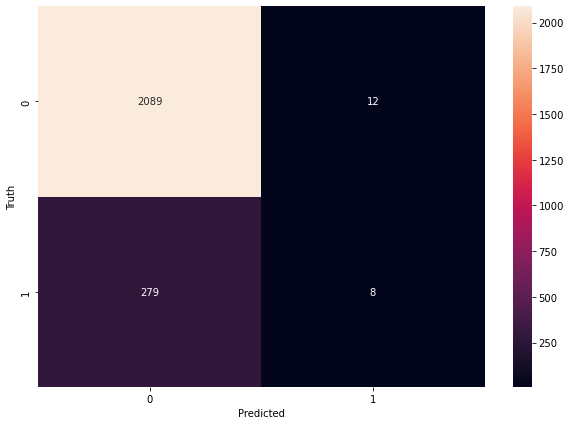

In [272]:
import tensorflow as tf
import seaborn as sn
#pred = pred_7244["predict"]

pred = np.where(lr_predict[:,1]>0.34,1,0)

cm = tf.math.confusion_matrix(labels=y_test,predictions=pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [498]:
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

In [499]:
# instanciate the models
#tree         = DecisionTreeClassifier()
logistic     = LogisticRegression(max_iter = 1000)
randomForest = RandomForestClassifier(n_estimators = 700)
boostedTree  = GradientBoostingClassifier()
XG           = XGBClassifier()
lgb          = lgb.LGBMRegressor()
#svm          = SVC(gamma = "scale", probability = True)
#neuralNetR    = MLPRegressor()
#neuralNetC    = MLPClassifier()
#neighbors    = KNeighborsClassifier()

# create a dict to loop through the models later on
models = {
          "logistic"     :logistic,
          "randomForest" :randomForest,
          "boostedTree"  :boostedTree,
          "XG"           :XG,
          "lgb"           :lgb

          #"neuralNetR"     :MLPRegressor,
          #"neuralNetC"     :MLPClassifier
         }

In [501]:
#X_train = X_train.drop("donorID", axis=1)


In [502]:
# fit the models
for model in models:
    models[model].fit(X_train,y_train)
    print(f"{model} has been trained successfully")

logistic has been trained successfully
randomForest has been trained successfully
boostedTree has been trained successfully
[17:51:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG has been trained successfully
lgb has been trained successfully


In [289]:
# all_feat =['donorID', 'campaignID', 'frequency_donor', 'total_donated', 'C1', 'C2',
#        'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13',
#        'total_amount_1_month', 'total_freq_1_month', 'total_amount_2_month',
#        'total_freq_2_month', 'total_amount_3_month', 'total_freq_3_month',
#        'total_amount_4_month', 'total_freq_4_month', 'total_amount_5_month',
#        'total_freq_5_month', 'total_amount_6_month', 'total_freq_6_month',
#        'Recency_dono', 'zipcode', 'gender', 'province_Brussels',
#        'province_East Flanders', 'province_Flemish Brabant',
#        'province_Hainaut', 'province_Liege', 'province_Limburg',
#        'province_Luxembourg', 'province_Missing', 'province_Namur',
#        'province_Walloon Brabant', 'province_West Flanders', 'region_Flanders',
#        'region_Missing', 'region_Wallonia', 'language_FR', 'language_NL',
#        'total_freq_till_now', 'total_amount_till_now',
#        'total_amount_till_last_3_years', 'total_freq_till_last_3_years', 'Age',
#        'caimpaign_flag']

In [319]:
X_test_72 = gift_base_7244[imp_vars]
y_test_72 = gift_base_7244["donated_more_than30_duringdv"]

In [416]:
X_test_72_2 = X_test_72.drop("donorID", axis=1)

In [503]:
# AUC

performances = {}

for model in models:
    predictions   = models[model].predict(X_test_72_2)
    probabilities = pd.DataFrame(models[model].predict_proba(X_test_72_2))[1]
    accuracy      = accuracy_score(y_test_72,predictions)
    auc           = roc_auc_score(np.array(y_test_72),np.array(probabilities))
    
    performances[model] = {"Accuracy":accuracy,"AUC":auc}

pd.DataFrame(performances)

AttributeError: 'LGBMRegressor' object has no attribute 'predict_proba'

In [490]:
combined

array([[0.936417  , 0.063583  ],
       [0.97909589, 0.02090411],
       [0.90624026, 0.09375975],
       ...,
       [0.93702567, 0.06297433],
       [0.98672679, 0.01327319],
       [0.8619857 , 0.1380143 ]])

In [491]:
roc_auc_score(np.array(y_test_72),combined[:,1])

0.7153817882098112

In [483]:
combined

array([[0.936417  , 0.063583  ],
       [0.97909589, 0.02090411],
       [0.90624026, 0.09375975],
       ...,
       [0.93702567, 0.06297433],
       [0.98672679, 0.01327319],
       [0.8619857 , 0.1380143 ]])

In [515]:
predictions

array([ 0.04405969,  0.0079675 ,  0.12986806, ...,  0.07000628,
       -0.01409163,  0.21566327])

Text(69.0, 0.5, 'Truth')

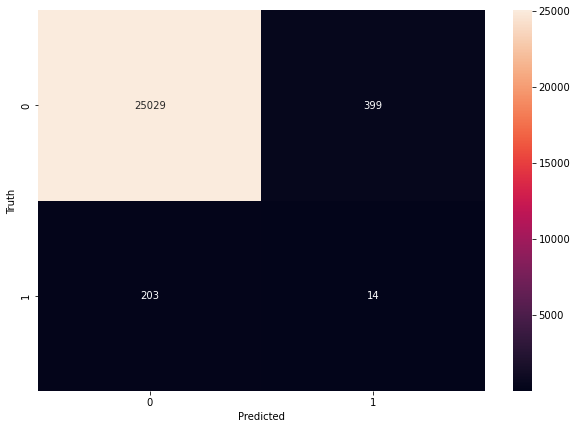

In [520]:
import tensorflow as tf
import seaborn as sn
#pred = pred_7244["predict"]
pred = np.where(predictions>.5, 1, 0)
#pred = np.where(predictions[:,1]>0.4,1,0)

cm = tf.math.confusion_matrix(labels=y_test_72,predictions=pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [372]:
hdf_train.shape

(7957, 55)

In [373]:
aml = H2OAutoML(seed=13, max_models=10, max_runtime_secs_per_model=120, max_runtime_secs=600)

In [379]:
aml.train(training_frame=hdf_train, y=y)

ValueError: Unexpected __getitem__ selector: <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>

In [376]:
# Get third model
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb

model_id,mean_residual_deviance,rmse,mse,mae,rmsle,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_4_AutoML_4_20211206_165400,0.0658387,0.256591,0.0658387,0.129133,0.179607,1282,0.054882,StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_4_20211206_165400,0.0683491,0.261437,0.0683491,0.148024,0.184032,327,0.01933,StackedEnsemble
StackedEnsemble_AllModels_5_AutoML_4_20211206_165400,0.0684964,0.261718,0.0684964,0.148032,0.183691,636,0.019612,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_4_20211206_165400,0.068961,0.262604,0.068961,0.150209,0.184874,271,0.017389,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_4_20211206_165400,0.0692079,0.263074,0.0692079,0.150569,0.185282,239,0.014225,StackedEnsemble
StackedEnsemble_BestOfFamily_4_AutoML_4_20211206_165400,0.0698811,0.26435,0.0698811,0.13656,0.185172,1061,0.018682,StackedEnsemble
StackedEnsemble_BestOfFamily_5_AutoML_4_20211206_165400,0.0702876,0.265118,0.0702876,0.152654,0.186868,574,0.013539,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_4_20211206_165400,0.07029,0.265123,0.07029,0.152717,0.187131,222,0.013998,StackedEnsemble
GBM_4_AutoML_4_20211206_165400,0.0703443,0.265225,0.0703443,0.152972,0.186613,756,0.01929,GBM
StackedEnsemble_BestOfFamily_3_AutoML_4_20211206_165400,0.0703557,0.265246,0.0703557,0.152804,0.18724,223,0.013987,StackedEnsemble


In [377]:
m = h2o.get_model("GBM_4_AutoML_4_20211206_165400")

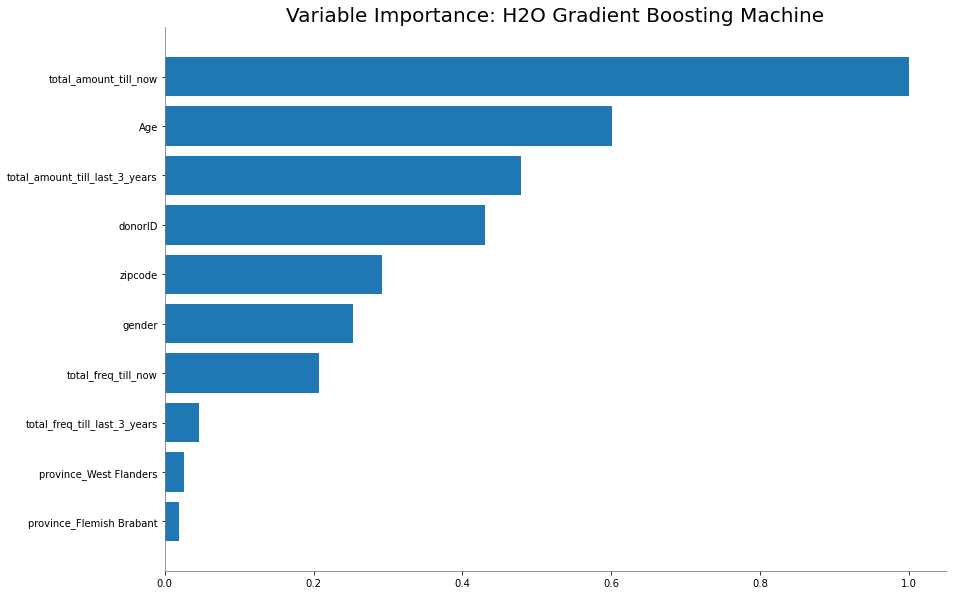

In [378]:
m.varimp_plot()

In [380]:
m.varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,total_amount_till_now,849.072205,1.000000,0.292531
1,Age,510.056854,0.600723,0.175730
2,total_amount_till_last_3_years,406.280762,0.478500,0.139976
3,donorID,365.651154,0.430648,0.125978
4,zipcode,248.176086,0.292291,0.085504
5,gender,215.021194,0.253243,0.074081
6,total_freq_till_now,176.075912,0.207374,0.060663
7,total_freq_till_last_3_years,39.397484,0.046401,0.013574
8,province_West Flanders,22.202629,0.026149,0.007649
9,province_Flemish Brabant,15.831305,0.018645,0.005454


In [381]:
var_imp = m.varimp(use_pandas=True)
imp_vars = np.array(var_imp[var_imp.scaled_importance>0.026149]["variable"])
imp_vars

array(['total_amount_till_now', 'Age', 'total_amount_till_last_3_years',
       'donorID', 'zipcode', 'gender', 'total_freq_till_now',
       'total_freq_till_last_3_years', 'province_West Flanders'],
      dtype=object)

In [383]:
features = np.delete(features,4)

In [387]:
features = imp_vars
features = np.append(features, 'donated_more_than30_duringdv')

X = gift_base_6169[features]
y = gift_base_6169['donated_more_than30_duringdv']

In [388]:
#Create H2O frame
hdf_train =  h2o.H2OFrame(test_camp[features])

train, test =hdf_train.split_frame(ratios=[0.8], seed = 42)

y = "donated_more_than30_duringdv"

aml.train(training_frame=train, y=y)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
16:54:00.246: AutoML: XGBoost is not available; skipping it.
16:54:00.250: Step 'best_of_family_xgboost' not defined in provider 'StackedEnsemble': skipping it.
16:54:00.250: Step 'all_xgboost' not defined in provider 'StackedEnsemble': skipping it.
17:01:35.638: New models will be added to existing leaderboard AutoML_4_20211206_165400@@donated_more_than30_duringdv (leaderboard frame=null) with already 20 models.
17:01:35.638: AutoML: XGBoost is not available; skipping it.
17:01:35.639: Step 'best_of_family_xgboost' not defined in provider 'StackedEnsemble': skipping it.
17:01:35.639: Step 'all_xgboost' not defined in provider 'StackedEnsemble': skipping it.
17:01:39.697: StackedEnsemble_BestOfFamily_6_AutoML_5_20211206_170135 [StackedEnsemble best_of_family_1 (built with AUTO metalearner, using top model from each algorithm type)] failed: water.exceptions.H2OIllegalArgume

In [104]:
h_gift_7244 = gift_base_7244[features]
y_7244 = gift_base_7244['donated_more_than30_duringdv']

#h_gift_7244 = h_gift_7244.drop("donated_more_than30_duringdv")

h_7244 =  h2o.H2OFrame(h_gift_7244)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [105]:
type(h_7244)

h2o.frame.H2OFrame

In [111]:
m = aml.leader

In [106]:
import shutup
shutup.please()
pred_7244 = aml.predict(h_7244)
#pred = np.where(pred_7244["predict"]>0.51,1,0)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [107]:
len(train[train["donated_more_than30_duringdv"]==1])

764

In [108]:
pred_7244 = h2o.as_list(pred_7244)
pred_7244

,predict
0,0.684769
1,0.289550
2,0.594960
3,0.722252
4,0.156112
...,...
25640,0.396752
25641,0.106739
25642,0.255584
25643,0.278090


In [109]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_7244, pred_7244)

#Plot ROC AUC Curve 
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [121]:
from sklearn.metrics import confusion_matrix
pred = np.where(pred_7244["predict"]>0.6,1,0)
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_7244, pred)

print(cf_matrix)

[[21677  3751]
 [  152    65]]


In [130]:
gift_base_7244.to_csv("7244.csv")

Text(69.0, 0.5, 'Truth')

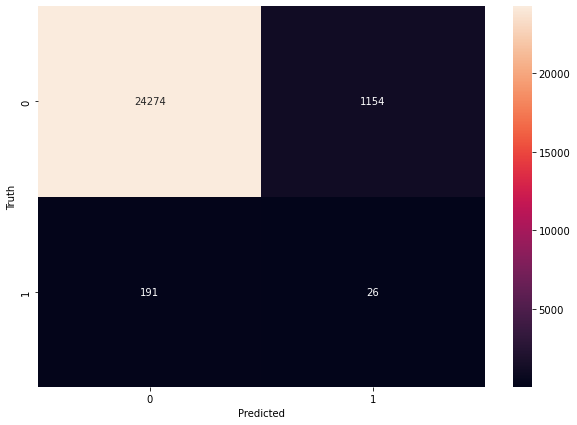

In [396]:
import tensorflow as tf
import seaborn as sn
#pred = pred_7244["predict"]
pred = np.where(pred_7244["predict"]>0.8,1,0)

cm = tf.math.confusion_matrix(labels=y_7244,predictions=pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [792]:
# from sklearn.svm import SVR

# lr = LogisticRegression(penalty="none", fit_intercept=True
#                 , intercept_scaling=1, random_state=None, solver="lbfgs"
#                 , max_iter=300, multi_class="auto"
#                 , verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)



# svr = SVR(kernel = 'sigmoid')

In [828]:
h_7244_res = h2o.as_list(h_7244)
h_7244_res["pred"] = pred_7244["predict"]
h_7244_res.to_csv("h_7244_res.csv")

In [793]:
lr.fit(X_train, y_train)

#svr.fit(X_train, y_train)

LogisticRegression(max_iter=300, penalty='none')

In [794]:
from sklearn.metrics import accuracy_score, mean_absolute_error

In [795]:
X_7244 = gift_base_7244[features]
y_7244 = gift_base_7244["donated_more_than30_duringdv"]

In [798]:
# # predict
# pred_train_lr = lr.predict(X_train)
# pred_test_lr = lr.predict(X_test)
# pred_7244_lr = lr.predict(X_7244)

# # pred_train_svr = svr.predict(X_train)
# # pred_test_svr = svr.predict(X_test)
# # pred_7244_svr = svr.predict(X_7244)

# # evaluate predictions
# rf_mae_train_lr = mean_absolute_error(y_train, pred_train_lr)
# rf_mae_test_lr = mean_absolute_error(y_test, pred_test_lr)

# #rf_mae_train_svr = mean_absolute_error(y_train, pred_train_svr)
# #rf_mae_test_svr = mean_absolute_error(y_test, pred_test_svr)

In [226]:
fpr, tpr, thresholds = roc_curve(y_test, pred_test_lr)

auc = roc_auc_score(y_test, pred_test_lr)
print('AUC LR: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, pred_test_svr)

auc = roc_auc_score(y_test, pred_test_svr)
print('AUC SVR: %.3f' % auc)

AUC LR: 0.500
AUC SVR: 0.485


In [235]:
fpr, tpr, thresholds = roc_curve(y_7244, pred_7244_lr)

auc = roc_auc_score(y_7244, pred_7244_lr)
print('AUC LR 7244: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y_7244, pred_7244_svr)

auc = roc_auc_score(y_7244, pred_7244_svr)
print('AUC SVR 7244: %.3f' % auc)

AUC LR 7244: 0.500
AUC SVR 7244: 0.487


In [237]:
threshold = 0.6

predicted_proba = lr.predict_proba(X_7244)
pred_test = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = accuracy_score(y_7244, pred_test)
accuracy

0.9915383115617079

In [92]:
# X_test["pred"] = pred_test

In [93]:
# X_test.to_csv("test.csv", index=False)

In [94]:
# gift_base_6169.to_csv("6169.csv", index=False)

In [95]:
# import sqldf


In [96]:
# sqldf.run("""
# select 
# a.donorID,
# a.pred,
# b.donated_more_than30_duringdv
#  from 
# X_test as a
# inner join gift_base_6169 as b on a.donorID=b.donorID
# where a.pred = 1

# """)

,donorID,pred,donated_more_than30_duringdv


In [238]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(loss="exponential", learning_rate=0.1, n_estimators=100)

gb.fit(X_train, y_train)

gb_predictions_train = gb.predict(X_train)
gb_predictions_test = gb.predict(X_7244)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(gb, X_7244, y_7244, scoring='accuracy', cv=cv, n_jobs=-1)
print(n_scores.mean())

0.9915253335279611


In [419]:
# from sklearn.metrics import roc_curve, auc


# fpr, tpr, thresholds = roc_curve(y_7244,  gb.predict_proba(X_7244)[:,1])

# #Plot ROC AUC Curve 
# fig = px.area(
#     x=fpr, y=tpr,
#     title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
#     labels=dict(x='False Positive Rate', y='True Positive Rate'),
#     width=700, height=500
# )
# fig.add_shape(
#     type='line', line=dict(dash='dash'),
#     x0=0, x1=1, y0=0, y1=1
# )

# fig.update_yaxes(scaleanchor="x", scaleratio=1)
# fig.update_xaxes(constrain='domain')
# fig.show()

In [240]:
gb_predictions_test = gb.predict(X_7244)


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(gb, X_7244, y_7244, scoring='accuracy', cv=cv, n_jobs=-1)
print(n_scores.mean())

0.9915253335279611


In [418]:
# from sklearn.metrics import roc_curve, auc


# fpr, tpr, thresholds = roc_curve(y_7244,  gb.predict_proba(X_7244)[:,1])

# #Plot ROC AUC Curve 
# fig = px.area(
#     x=fpr, y=tpr,
#     title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
#     labels=dict(x='False Positive Rate', y='True Positive Rate'),
#     width=700, height=500
# )
# fig.add_shape(
#     type='line', line=dict(dash='dash'),
#     x0=0, x1=1, y0=0, y1=1
# )

# fig.update_yaxes(scaleanchor="x", scaleratio=1)
# fig.update_xaxes(constrain='domain')
# fig.show()

In [301]:
X_train.shape

(34888, 32)

In [367]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as K

tf.random.set_seed(123)

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(32,), activation='sigmoid'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(2, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid',
    kernel_regularizer=tf.keras.regularizers.l2(0.0001)
    )
])

opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [417]:
#model.fit(X_train, y_train, workers=12, shuffle=5, epochs=20, batch_size=70)

In [410]:
# instanciate the models
#tree         = DecisionTreeClassifier()
logistic     = LogisticRegression(max_iter = 1000)
randomForest = RandomForestClassifier(n_estimators = 700)
boostedTree  = GradientBoostingClassifier()
#svm          = SVC(gamma = "scale", probability = True)
#neuralNet    = MLPClassifier()
#neighbors    = KNeighborsClassifier()

In [411]:
# create a dict to loop through the models later on
models = {
          "logistic"     :logistic,
          "randomForest" :randomForest,
          "boostedTree"  :boostedTree,
         }

In [412]:
# fit the models
for model in models:
    models[model].fit(X_train,y_train)
    print(f"{model} has been trained successfully")

logistic has been trained successfully
randomForest has been trained successfully
boostedTree has been trained successfully


In [415]:
# AUC

performances = {}

for model in models:
    predictions   = models[model].predict(X_train)
    probabilities = pd.DataFrame(models[model].predict_proba(X_train))[1]
    accuracy      = accuracy_score(y_train,predictions)
    auc           = roc_auc_score(np.array(y_train),np.array(probabilities))
    
    performances[model] = {"Accuracy":accuracy,"AUC":auc}

In [416]:
pd.DataFrame(performances)

,logistic,randomForest,boostedTree
Accuracy,0.972569,1.0,0.973573
AUC,0.604755,1.0,0.785413


1091/1091 [==============================] - 1s 834us/step - loss: 0.1257 - accuracy: 0.9726
97.25693464279175


Text(69.0, 0.5, 'Truth')

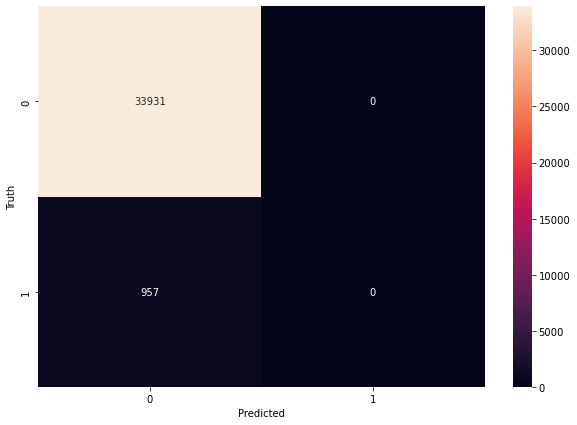

In [360]:
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sn

#Evaluate model
scores = model.evaluate(X_train, y_train)
print(scores[1]*100)

yp = model.predict(X_train)

y_pred = []
for element in yp:
    if element > 0.32:
        y_pred.append(1)
    else:
        y_pred.append(0)

#print(classification_report(X_train,y_train))

cm = tf.math.confusion_matrix(labels=y_train,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [251]:
#ann_test_pred = model.predict(X_test)
ann_7244_pred = model.predict(X_7244)

In [260]:
ann_7244_pred.ravel()

array([0.02741548, 0.02741548, 0.02741548, ..., 0.02741548, 0.02741548,
       0.02741548], dtype=float32)

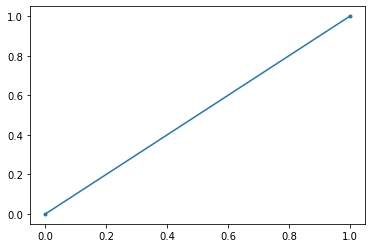

In [269]:
from sklearn.metrics import roc_curve, auc


y_pred = model.predict(X_7244).ravel()

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_7244, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)


In [151]:
from sklearn.metrics import roc_curve, auc


fpr, tpr, thresholds = roc_curve(y_7244,  model.predict(X_7244).ravel())

#Plot ROC AUC Curve 
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [ ]:
from keras.models import model_from_json
from tensorflow.keras.models import load_model
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")